<a href="https://colab.research.google.com/github/beenishsanjrani/earthquakes/blob/plots-mt-bre-beenishsanjrani/RSE4_ClassPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Contuining on from the earthquake exercise

In [30]:
from datetime import date

import matplotlib.pyplot as plt

import requests

import json

In [31]:
def get_data():
    """Retrieve the data we will be working with."""
    response = requests.get(
        "http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
        params={
            'starttime': "2000-01-01",
            "maxlatitude": "58.723",
            "minlatitude": "50.008",
            "maxlongitude": "1.67",
            "minlongitude": "-9.756",
            "minmagnitude": "1",
            "endtime": "2018-10-11",
            "orderby": "time-asc"}
    )

    text = response.text
    return json.loads(text)

In [32]:
def get_year(earthquake):
    """Extract the year in which an earthquake happened."""
    timestamp = earthquake['properties']['time']

    year = date.fromtimestamp(timestamp/1000).year # converting from milliseconds into a year
    # divides by 1000 because date.fromtimestamp function usually works in seconds
    return year

# EQ_data = requests.get('https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime=2000-01-01&maxlatitude=58.723&minlatitude=50.008&maxlongitude=1.67&minlongitude=-9.756&minmagnitude=1&endtime=2018-10-11&orderby=time-asc').text


In [33]:
def get_magnitude(earthquake):
    """Retrive the magnitude of an earthquake item."""
    return earthquake["properties"]["mag"]

In [39]:
def get_magnitudes_per_year(earthquakes):
    """Retrieve the magnitudes of all the earthquakes in a given year.

    Returns a dictionary with years as keys, and lists of magnitudes as values.
    """
    magnitudes_per_year = {}  # initialise empty dict

    # iterate through each earthquake
    for earthquake in earthquakes:
        year = get_year(earthquake)
        mag = get_magnitude(earthquake)

        # if year is already a key in dictionary
        if year in magnitudes_per_year:
            magnitudes_per_year[year].append(mag) # append the magnitude to the existing list
        else:
            # otherwise, create new key with a list of mags
            magnitudes_per_year[year] = [mag]

    return magnitudes_per_year

In [40]:
def plot_average_magnitude_per_year(earthquakes):
    yearly_magnitudes = get_magnitudes_per_year(earthquakes)
    yearly_avg_magnitude = {year: sum(mags)/len(mags) for year, mags in yearly_magnitudes.items()}

    plt.bar(yearly_avg_magnitude.keys(), yearly_avg_magnitude.values())
    plt.xlabel('Year')
    plt.ylabel('Average Magnitude')
    plt.title('Average Magnitude of Earthquakes Per Year')
    plt.xticks(list(yearly_avg_magnitude.keys()), rotation=45)  # To ensure x-axis labels are integer years
    plt.tight_layout()
    plt.show()


In [41]:
def plot_number_per_year(earthquakes):
    yearly_counts = {}
    for quake in earthquakes:
        year = get_year(quake)
        yearly_counts[year] = yearly_counts.get(year, 0) + 1

    plt.bar(yearly_counts.keys(), yearly_counts.values())
    plt.xlabel('Year')
    plt.ylabel('Number of Earthquakes')
    plt.title('Number of Earthquakes Per Year')
    plt.xticks(list(yearly_counts.keys()), rotation=45)  # To ensure x-axis labels are integer years
    plt.tight_layout()
    plt.show()

In [42]:
# Get the data we will work with
quakes = get_data()['features']

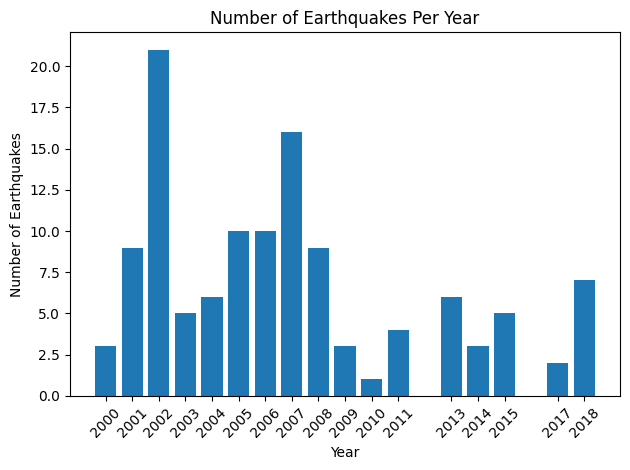

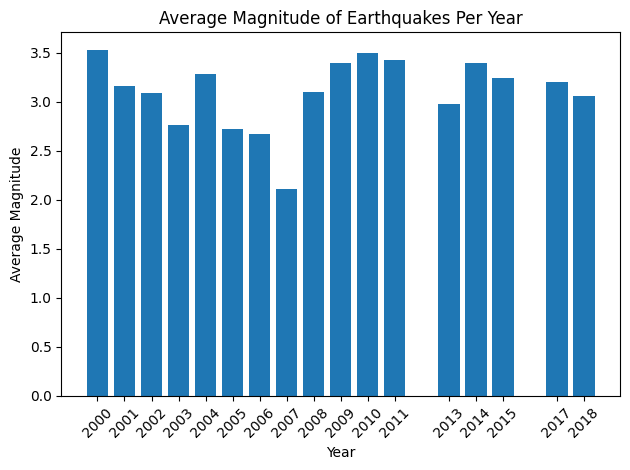

In [43]:
# Plot the results - this is not perfect since the x axis is shown as real
# numbers rather than integers, which is what we would prefer!
plot_number_per_year(quakes)
plt.clf()  # This clears the figure, so that we don't overlay the two plots
plot_average_magnitude_per_year(quakes)